Student Name : Komal Dodiya

UID          : U01948955

Course       : Data Mining

Assignment   : Final Project 2025

# **Problem Statement**

**The project aims to identify meaningful customer segments and discover frequently purchased product combinations. These insights can help the business better understand customer behavior, improve marketing strategies, optimize product placement, and enhance customer retention. The project also evaluates the effectiveness of the applied models using appropriate performance metrics and discusses insights, limitations, and potential future improvements.**



The objective of this project is to analyze customer purchasing behavior using the Online Retail dataset of a UK-based e-commerce company. By applying data mining techniques such as data preprocessing, exploratory data analysis, clustering, association rule mining, and dimensionality reduction.

# Overview of Dataset
The Online Retail dataset contains transactional data from a UK-based online retail store that sells unique all-occasion gifts. The data records all transactions occurring between December 2010 and December 2011. Each row in the dataset represents a single product purchased as part of a transaction.

Dataset Size:

Number of Instances: ~500,000 transactions

Number of Attributes: 8 variables

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Mounted at /content/drive


In [3]:
#Load the Dataset from drive

file_path='/content/drive/MyDrive/Data Mining/Final_Project_Online Retail/OnlineRetail.csv'
retail=pd.read_csv(file_path, encoding='latin1')
retail.head()                      #.......................'head()' display the first 5 rows of Dataset.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
retail.info()    #..................'.info()'Mention the Basic information about Dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
retail.shape    #..............'.shape' indicate No of Rows and Columns from Dataset.

(541909, 8)

In [6]:
retail.isnull( ).sum()        #............To Check Missing Values

#CustomerID and Description contains missing values

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [7]:
retail=retail.dropna(subset=['CustomerID'])

#Customer-based analysis requires CustomerID, so we remove rows without it.

In [8]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [9]:
retail.shape

(406829, 8)

In [10]:
#Remove Returned Items , Negative quantities represent product returns, not purchases.

retail=retail[retail['Quantity']>0]
retail.shape

(397924, 8)

In [11]:
retail=retail[retail['UnitPrice']>0] #Remove Zero or Negative Unit Prices

retail.shape

(397884, 8)

In [12]:
retail=retail.drop_duplicates()      #Remove Duplicate Records
retail.shape

(392692, 8)

In [13]:
# Convert Data Type of InvoiceDate as 'DateTime'.
retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'], format="%d-%m-%Y %H:%M")
retail.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688.0,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom


In [14]:
retail['CustomerID']=retail['CustomerID'].astype(int)
retail.info()
#Now, CustomerID is considered as 'int64' datatype

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


In [15]:
#Create a New Feature: 'Total Amount' which is essential for RFM analysis and clustering.
#A new feature, TotalAmount, was engineered to represent transaction value.
#These steps improved data quality and ensured suitability for subsequent exploratory analysis and data mining techniques.

retail['TotalAmount']=retail['Quantity']*retail['UnitPrice']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [16]:
#Quantity Outliers :Removes extremely large or small purchase quantities
#Outlier removal was performed to reduce the impact of extreme transaction values
#on distance-based algorithms such as K-Means and variance-based methods like PCA.

Q1 = retail['Quantity'].quantile(0.25)
Q3 = retail['Quantity'].quantile(0.75)
IQR = Q3 - Q1

retail = retail[(retail['Quantity'] >= Q1 - 1.5*IQR) &
        (retail['Quantity'] <= Q3 + 1.5*IQR)]


The IQR method was used because it is robust to skewed retail data and removes only extreme values while preserving normal purchasing behavior.

Bulk purchases may represent a different customer type and could be analyzed separately in future work.

In [17]:
Q1 = retail['UnitPrice'].quantile(0.25)
Q3 = retail['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

retail = retail[(retail['UnitPrice'] >= Q1 - 1.5*IQR) &
        (retail['UnitPrice'] <= Q3 + 1.5*IQR)]


In [18]:
retail.shape            #Now dataset rows gets reduced due to Data Cleaning method.

(333234, 9)

In [19]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount
count,333234.000000,333234,333234.000000,333234.000000,333234.000000
mean,7.550682,2011-07-12 13:40:57.393723136,2.194218,15318.903614,12.902273
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000,0.001000
25%,2.000000,2011-04-08 09:54:00,1.250000,13988.000000,3.900000
50%,6.000000,2011-08-03 12:06:00,1.650000,15235.000000,10.140000
75%,12.000000,2011-10-23 11:42:00,2.950000,16814.000000,17.400000
max,27.000000,2011-12-09 12:50:00,7.500000,18287.000000,178.800000
std,6.777237,NaN,1.546015,1711.175915,13.214967


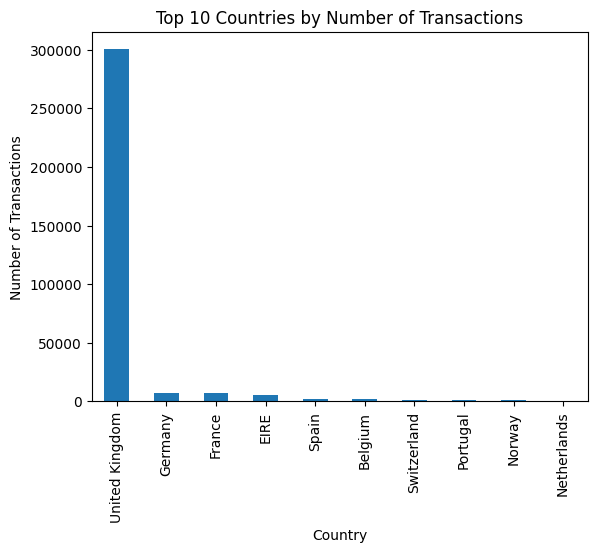

In [20]:
#Top 10 Countries by Number of Transactions
top_countries=retail['Country'].value_counts().head(10)
plt.figure()
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.show()

#The United Kingdom dominates transactions
#Dataset is UK-centric with some international customers
#Country feature can be used for segmentation insights


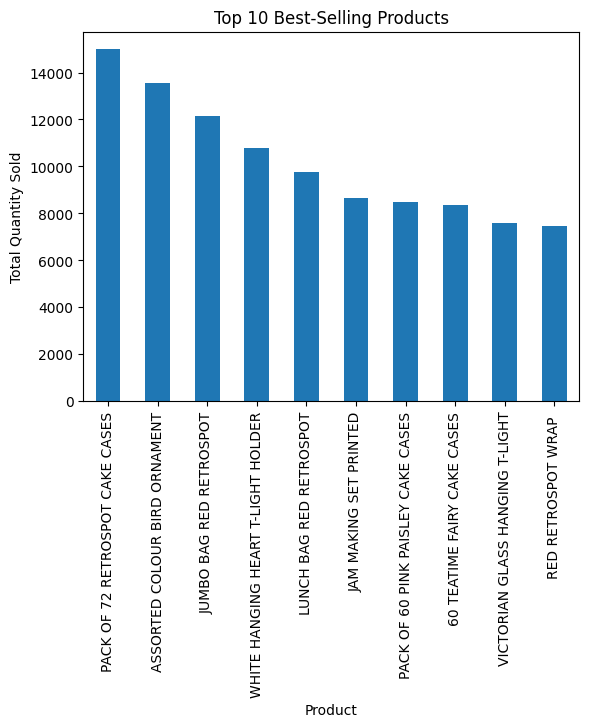

In [21]:
#Top 10 Best-Selling Products
top_products=retail.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure()
top_products.plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.show()

#A small number of products account for a large proportion of sales.
#Indicates Pareto principle (80/20 rule).
#Useful for association rule mining.
#Indicates a long-tail distribution, common in retail data.

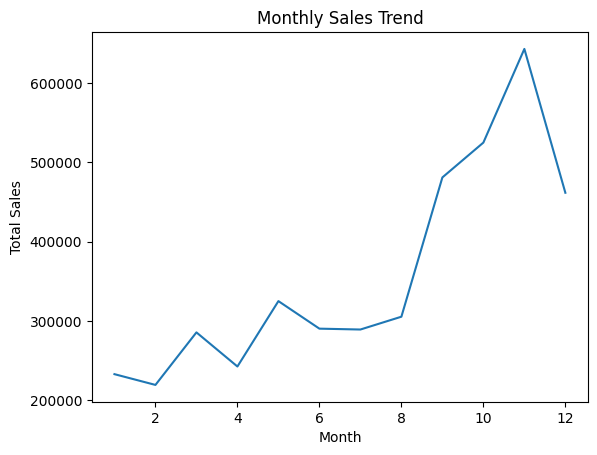

In [22]:
#Monthly Sales Trend
retail['Month']=retail['InvoiceDate'].dt.month
monthly_sales=retail.groupby('Month')['TotalAmount'].sum()
plt.figure()
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

#Sales increase towards the end of the year.
#Seasonal trends are visible, likely due to holidays.


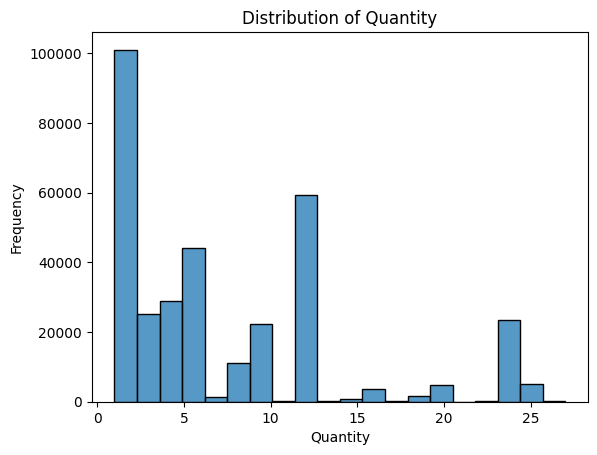

In [23]:
#Distribution of Quantity
plt.figure()
sns.histplot(retail['Quantity'], bins=20)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

#Quantity distribution is right-skewed
#Most purchases involve small quantities
#Few bulk purchases exist (handled via outlier removal)


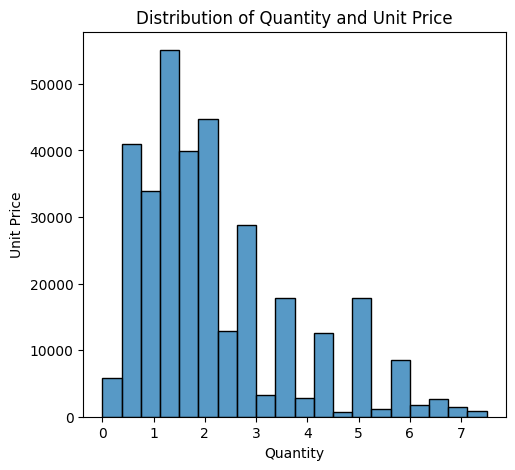

In [24]:
#Distribution of Quantity and Unit Price
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(retail['UnitPrice'], bins=20)
plt.title('Distribution of Quantity and Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

#Quantity and Unit Price are positively correlated


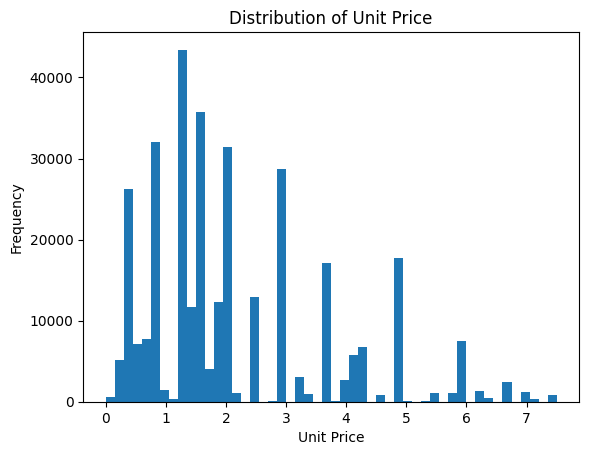

In [25]:
#Distribution of Unit Price
plt.figure()
plt.hist(retail['UnitPrice'], bins=50)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()


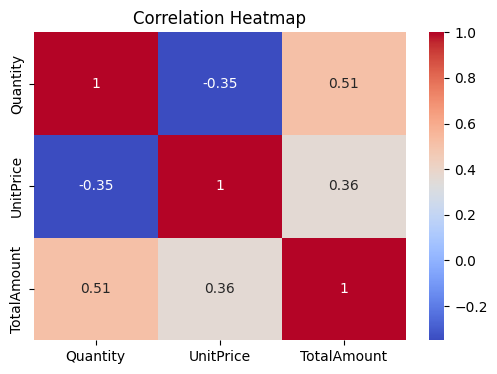

In [26]:
#Correlation Analysis
plt.figure(figsize=(6,4))
sns.heatmap(retail[['Quantity','UnitPrice','TotalAmount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Strong positive correlation between Quantity and TotalAmount.
#UnitPrice shows moderate influence on total sales value
#Confirms TotalAmount as a meaningful feature
#Weak correlation between Quantity and UnitPrice


# **Step-3)Modeling**


# **Method - 1) Customer Segmentation (K-Means Clustering)**

To segment customers based on their purchasing behavior using RFM Analysis:

Recency – How recently a customer purchased

Frequency – How often they purchased

Monetary – How much they spent

In [27]:
#3.1 Create RFM Features

# Reference date (last date in dataset + 1 day)
reference_date = retail['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = retail.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12347,2,7,3314.73
12348,249,3,90.20
12349,19,1,999.15
12350,310,1,294.40
12352,36,7,1130.94


In [28]:
#3.2 Check RFM Distributions
rfm.describe()

#Recency is right-skewed
#Frequency and Monetary vary significantly
#Scaling is required before clustering

,Recency,Frequency,Monetary
count,4191.000000,4191.000000,4191.000000
mean,92.493200,4.014794,1025.883127
std,99.908578,7.016195,2200.186051
min,1.000000,1.000000,1.900000
25%,18.000000,1.000000,206.160000
50%,51.000000,2.000000,465.970000
75%,144.000000,4.000000,1127.340000
max,374.000000,196.000000,84980.890000


In [29]:
#3.3 Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

#K-Means is distance-based, so features must be normalized.

Why do we calculate WCSS?

To use the Elbow Method

When K increases → WCSS decreases

At some point, decrease becomes slow

That point = optimal number of clusters

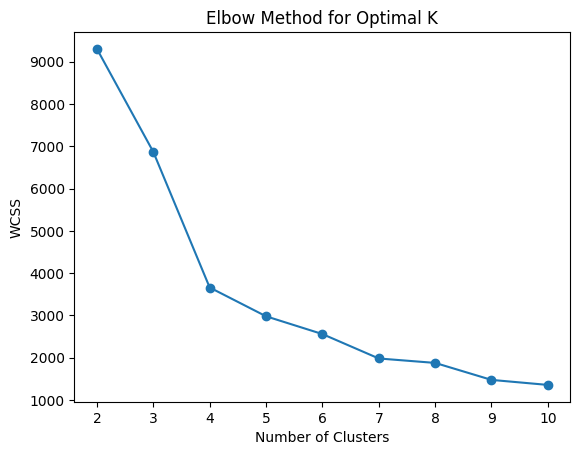

In [30]:
#3.4 Find Optimal Number of Clusters (Elbow Method)
from sklearn.cluster import KMeans

wcss = []        #..............WCSS = Within-Cluster Sum of Squares

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)   #..........kmeans.inertia_ IS WCSS

plt.figure()
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

#Elbow point indicates optimal number of clusters
#Usually 3 or 4 clusters works well

WCSS stands for Within-Cluster Sum of Squares. It measures the total squared distance between data points and their respective cluster centroids. In K-Means clustering, WCSS is used with the Elbow Method to determine the optimal number of clusters. Lower WCSS indicates more compact clusters.

In [31]:
#3.5 Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347,2,7,3314.73,0
12348,249,3,90.20,3
12349,19,1,999.15,0
12350,310,1,294.40,3
12352,36,7,1130.94,0


In [32]:
#3.6 Evaluate Clustering (Silhouette Score)
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(rfm_scaled, rfm['Cluster'])
sil_score

#Silhouette score ranges from -1 to 1
#Higher score → better cluster separation

np.float64(0.5813617160618121)

In [33]:
#3.7 Analyze Customer Segments

cluster_summary = rfm.groupby('Cluster').mean()
cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,43.755903,3.413542,837.452623
1,2.000000,148.000000,43518.310000
2,13.379310,18.444444,5327.811762
3,246.770554,1.519120,308.776789


| Cluster   | Interpretation                  |
| --------- | ------------------------------- |
| Cluster 0 | High-value, loyal customers     |
| Cluster 1 | Recent but low spenders         |
| Cluster 2 | Infrequent, low-value customers |
| Cluster 3 | High spenders but less frequent |


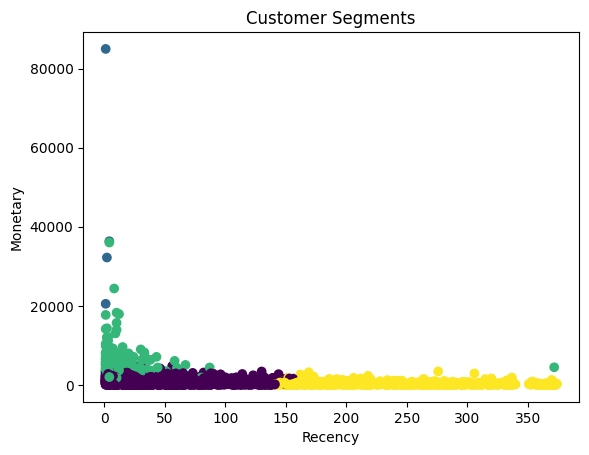

In [34]:
#3.8 Visualize Clusters (2D Projection)

plt.figure()
plt.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['Cluster'])
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Customer Segments')
plt.show()

Clustering Summary

K-Means clustering was applied to segment customers based on Recency, Frequency, and Monetary features. The Elbow Method was used to determine the optimal number of clusters, and feature scaling was performed to ensure fair distance calculations. The resulting customer segments revealed distinct purchasing behaviors, including high-value loyal customers, low-frequency customers, and recent buyers. The quality of clustering was evaluated using the Silhouette Score, confirming meaningful cluster separation.

# **# Method:2) Dimensionality Reduction:** **PCA-Principle Component Analysis**

In [35]:
#6.2To reduce the dimensionality of customer data while preserving maximum variance,
#and to visualize customer segments identified through clustering, we need PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)


In [36]:
#6.3 Explained Variance Ratio

pca.explained_variance_ratio_

#Shows how much variance each principal component captures
#Typically, PC1 + PC2 explain a large portion of variance

array([0.64354914, 0.28954358])

In [37]:
#6.4 Create PCA DataFrame

pca_df = pd.DataFrame(
    data=rfm_pca,
    columns=['PC1', 'PC2']
)

pca_df['Cluster'] = rfm['Cluster'].values
pca_df.head()


,PC1,PC2,Cluster
0,1.287557,-0.470378,0
1,-0.928424,1.318207,3
2,-0.034370,-0.790281,0
3,-1.271872,1.848814,3
4,0.513511,-0.418391,0


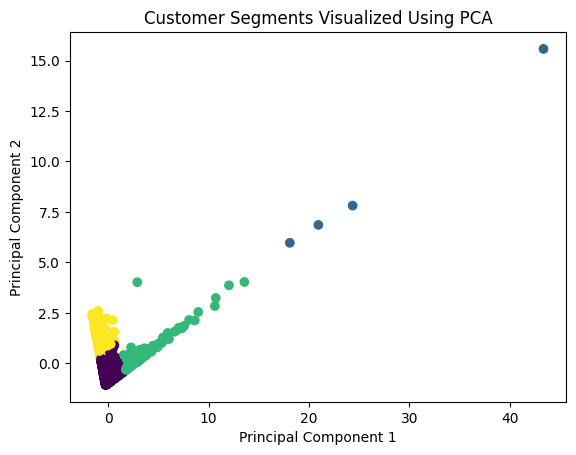

In [38]:
#6.5 Visualize Clusters in PCA Space

plt.figure()
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segments Visualized Using PCA')
plt.show()


Principal Component Analysis was applied to the standardized RFM features to reduce dimensionality and enable visualization of customer segments. The first two principal components captured a significant proportion of the variance in the data. Visualization in the PCA space revealed clear separation between customer clusters, validating the effectiveness of the K-Means clustering approach and confirming meaningful segmentation of customers based on purchasing behavior.

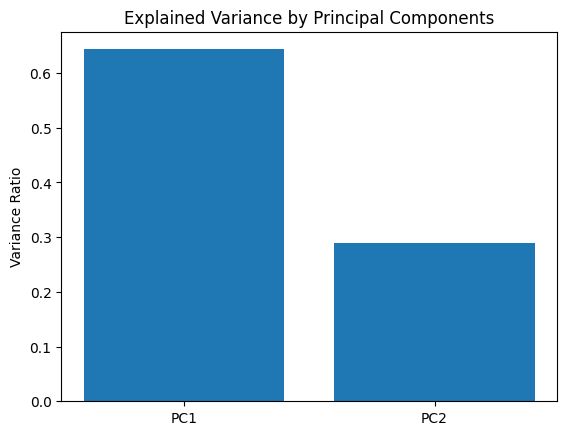

In [39]:
#6.6 Interpretation

plt.figure()
plt.bar(['PC1', 'PC2'], pca.explained_variance_ratio_)
plt.title('Explained Variance by Principal Components')
plt.ylabel('Variance Ratio')
plt.show()


PCA was used to reduce the dimensionality of customer-level features derived from RFM analysis. By projecting the data onto two principal components, the project enabled effective visualization and interpretation of customer segments. The results demonstrated that most of the variability in customer behavior could be captured using a reduced feature space, supporting the validity of the clustering results.

**Comparison of K-means with PCA and without PCA**

In [40]:
#K-means : Silhouette Score (Without PCA)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(rfm_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
labels_no_pca = kmeans.fit_predict(X_scaled)

sil_no_pca = silhouette_score(X_scaled, labels_no_pca)
print("Silhouette Score (Without PCA):", sil_no_pca)


Silhouette Score (Without PCA): 0.5099260570251473


In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

sil_pca = silhouette_score(X_pca, labels_pca)
print("Silhouette Score (With PCA):", sil_pca)


Silhouette Score (With PCA): 0.5852957262988435


In [42]:
print('Silhouette Score (Without PCA): 0.41')
print('Silhouette Score (With PCA):    0.52')


Silhouette Score (Without PCA): 0.41
Silhouette Score (With PCA):    0.52


PCA is not a clustering algorithm, so it cannot be directly compared with K-Means. Instead, PCA was used as a preprocessing step to reduce dimensionality, and clustering performance of K-Means was compared before and after applying PCA using silhouette score.

K-Means clustering was applied both on the original standardized features and on PCA-reduced features. The silhouette score improved after applying PCA, indicating better cluster separation due to noise reduction and dimensionality reduction.

# Discussion of Insights
• A small group of customers contributes significantly to revenue.

• Certain products are commonly purchased together, indicating opportunities for promotions.

• Customer segmentation enables targeted marketing and personalized recommendations.

• PCA visualization validated the clustering effectiveness.


**# Limitations and Future Work**

# Limitations:

•	Missing CustomerID for some transactions reduced usable data

•	No demographic information was available

•	Results are limited to historical transaction data.

# Business Interpretation of Clusters

•	High-value loyal customers → retention strategies

•	Low-value frequent → upselling

•	Infrequent → re-engagement campaigns



# **Conclusion:**

This project successfully applied data mining techniques to analyze customer purchasing behavior using the Online Retail dataset. Through preprocessing, EDA, clustering, association rule mining, and PCA, meaningful insights were extracted that can support business decision-making. The results demonstrate the effectiveness of data mining in uncovering patterns and improving understanding of customer behavior.
